# Convolutional Neural Netrwork with MNIST

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math
from tensorflow.examples.tutorials.mnist import input_data
print("Tensorflow version " + tf.__version__)

Tensorflow version 1.8.0


In [45]:
# Download images and labels into mnist.test (10K images+labels) and mnist.train (60K images+labels)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True,reshape=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [46]:
tf.reset_default_graph()

In [47]:
x_data = tf.placeholder(tf.float32, [None, 28,28,1])
y_target = tf.placeholder(tf.float32, [None, 10])
        
#pkeep = tf.placeholder(tf.float32))
# step for variable learning rate
#step = tf.placeholder(tf.int32)



In [48]:
# three convolutional layers with their channel counts, and a
# fully connected layer (tha last layer has 10 softmax neurons)
K = 4  # first convolutional layer output depth
L = 8  # second convolutional layer output depth
M = 12  # third convolutional layer
N = 200  # fully connected layer


W1 = tf.Variable(tf.truncated_normal([5,5, 1, K], stddev=0.1))  # 5x5 patch, 1 input channel, K output channels
B1 = tf.Variable(tf.ones([K])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.ones([L])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.ones([M])/10)

W4 = tf.Variable(tf.truncated_normal([7 * 7 * M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10])/10)

# The model
stride = 1  # output is 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(x_data, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
stride = 2  # output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
stride = 2  # output is 7x7
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

# reshape the output from the third convolution for the fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])

Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# cross-entropy loss function (= -sum(Y_i * log(Yi)) ), normalised for batches of 100  images
# TensorFlow provides the softmax_cross_entropy_with_logits function to avoid numerical stability
# problems with log(0) which is NaN
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=y_target)
cross_entropy = tf.reduce_mean(cross_entropy)*100

# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [49]:
# training step, the learning rate is a placeholder

global_step = tf.Variable(0,trainable=False)
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
lr = 0.0001 +  tf.train.exponential_decay(0.003, global_step, 2000, 1/math.e)
optimizer = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

# init
init = tf.global_variables_initializer()
batch_size=64

In [100]:
train_acc=[]
test_acc=[]
with tf.Session() as sess:
    # Initialize all Variables
    sess.run(init)
   
    for epoch in range(10001):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        #Run the optimizer
        sess.run(optimizer, feed_dict={x_data:batch_x, y_target:batch_y})  
    
   
        # Print the Loss/Error after every 10000 epochs
        if epoch%2000 == 0:
            acc_train,err_train= sess.run([accuracy,cross_entropy], 
                                          feed_dict={x_data:batch_x, y_target:batch_y})   
            acc_test,err_test= sess.run([accuracy,cross_entropy],
                                        feed_dict={x_data: mnist.test.images, y_target:mnist.test.labels})
            
            train_acc.append(acc_train)
            test_acc.append(acc_test)
        
        
            print('Epoch:{0}, Train loss:{1},Train acc:{2},'.format( epoch,err_train,acc_train))
            print('Epoch:{0},Validation loss:{1},Validation acc:{2},'.format(epoch,err_test,acc_test))
                     

Epoch:0, Train loss:220.5623321533203,Train acc:0.1875,
Epoch:0,Validation loss:244.08883666992188,Validation acc:0.08760000020265579,
Epoch:2000, Train loss:0.9370568990707397,Train acc:1.0,
Epoch:2000,Validation loss:5.474689960479736,Validation acc:0.9829000234603882,
Epoch:4000, Train loss:3.2763962745666504,Train acc:0.984375,
Epoch:4000,Validation loss:4.850635528564453,Validation acc:0.9846000075340271,
Epoch:6000, Train loss:4.029606342315674,Train acc:0.984375,
Epoch:6000,Validation loss:5.227458477020264,Validation acc:0.9843000173568726,
Epoch:8000, Train loss:0.13561424612998962,Train acc:1.0,
Epoch:8000,Validation loss:4.97873592376709,Validation acc:0.988099992275238,
Epoch:10000, Train loss:0.33138975501060486,Train acc:1.0,
Epoch:10000,Validation loss:6.023477554321289,Validation acc:0.9861000180244446,


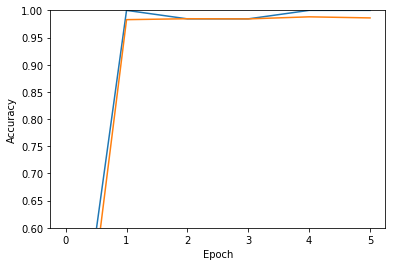

In [101]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.6,1)
plt.plot(train_acc)
plt.plot(test_acc)